# Bank data analysis

The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  
Make feature engineering but also try differnet models in order to get as much accuracy as possible.


In [78]:
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sns
import missingno #find missing data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint as sp_randint
import datetime

%matplotlib inline

In [79]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Read data

In [80]:
#read data
data = pd.read_csv('dataset.csv',sep = ';')  
# visualize the data
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [81]:
data = data.replace('unknown', np.nan)

In [82]:
data.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

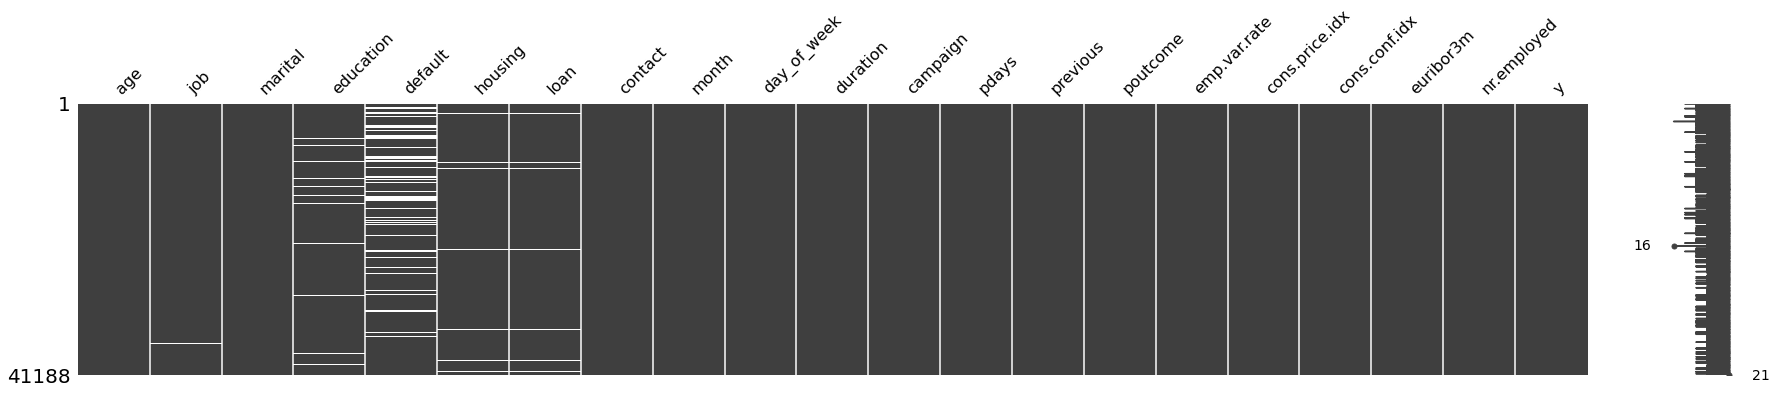

In [83]:
# How many missing values are there in our dataset?

missingno.matrix(data, figsize = (30,5))

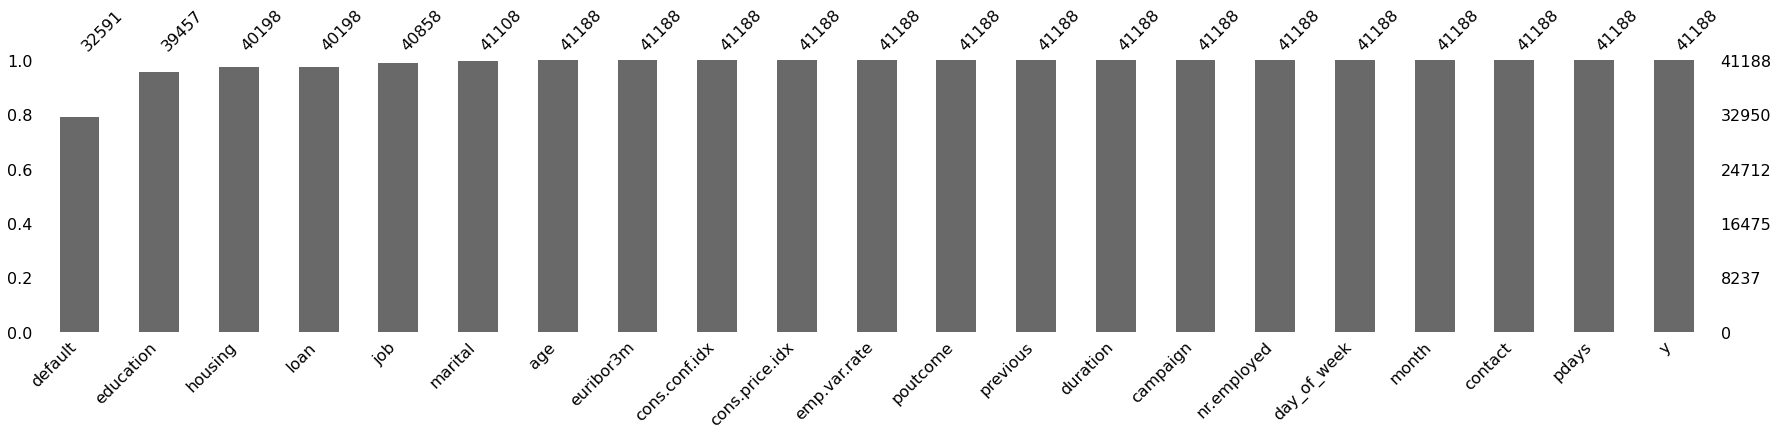

In [84]:
missingno.bar(data, sort='ascending', figsize = (30,5))

The purpose of creating a new dataset that contains all the values that are unknown and replace them with nan values give us the real picture of where data is missing. 
One way to clean dataset is to delete it, but it gives a bad image of the data and it is unrealistic. Another way is to find some correlation between the data and fill it in.

One way to fill in such data is with the statistical method fashion, where the most dominant feature is filled.


### Categorical variables:

In [85]:
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['job'] = data['job'].fillna(data['job'].mode()[0])
data['marital'] = data['marital'].fillna(data['marital'].mode()[0])
data['housing'] = data['housing'].fillna(data['housing'].mode()[0])
data['default'] = data['default'].fillna(data['default'].mode()[0])

In [86]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Numeric variables

In [87]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
data[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


We know that the missing values, or NaNs, in numeric variables are encoded as '999'. From the above table, it is clear that only 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing.

Helper Methods 

In [88]:
data['y'].replace({"no":0, "yes":1}, inplace=True)

Mean_encoded_job = data.groupby(['job'])['y'].mean().to_dict()   
data['job'] =  data['job'].map(Mean_encoded_job) 

In [89]:
Mean_encoded_marital = data.groupby(['marital'])['y'].mean().to_dict()   
data['marital'] =  data['marital'].map(Mean_encoded_marital) 

In [90]:
Mean_encoded_default = data.groupby(['default'])['y'].mean().to_dict()   
data['default'] =  data['default'].map(Mean_encoded_default)

Mean_encoded_housing = data.groupby(['housing'])['y'].mean().to_dict()   
data['housing'] =  data['housing'].map(Mean_encoded_housing)

Mean_encoded_loan = data.groupby(['loan'])['y'].mean().to_dict()   
data['loan'] =  data['loan'].map(Mean_encoded_loan)

Mean_encoded_contact = data.groupby(['contact'])['y'].mean().to_dict()   
data['contact'] =  data['contact'].map(Mean_encoded_contact)

Mean_encoded_month = data.groupby(['month'])['y'].mean().to_dict()   
data['month'] =  data['month'].map(Mean_encoded_month)

Mean_encoded_poutcome = data.groupby(['poutcome'])['y'].mean().to_dict()   
data['poutcome'] =  data['poutcome'].map(Mean_encoded_poutcome)

Mean_encoded_day_of_week = data.groupby(['day_of_week'])['y'].mean().to_dict()   
data['day_of_week'] =  data['day_of_week'].map(Mean_encoded_day_of_week)


In [91]:

Mean_encoded_education = data.groupby(['education'])['y'].mean().to_dict()   
data['education'] =  data['education'].map(Mean_encoded_education)

In [92]:
#data_drop
data_drop = pd.DataFrame()
data_drop = data

In [93]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null float64
marital           41188 non-null float64
education         41188 non-null float64
default           41188 non-null float64
housing           41188 non-null float64
loan              40198 non-null float64
contact           41188 non-null float64
month             41188 non-null float64
day_of_week       41188 non-null float64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null float64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(15), int64(6)
memory usage

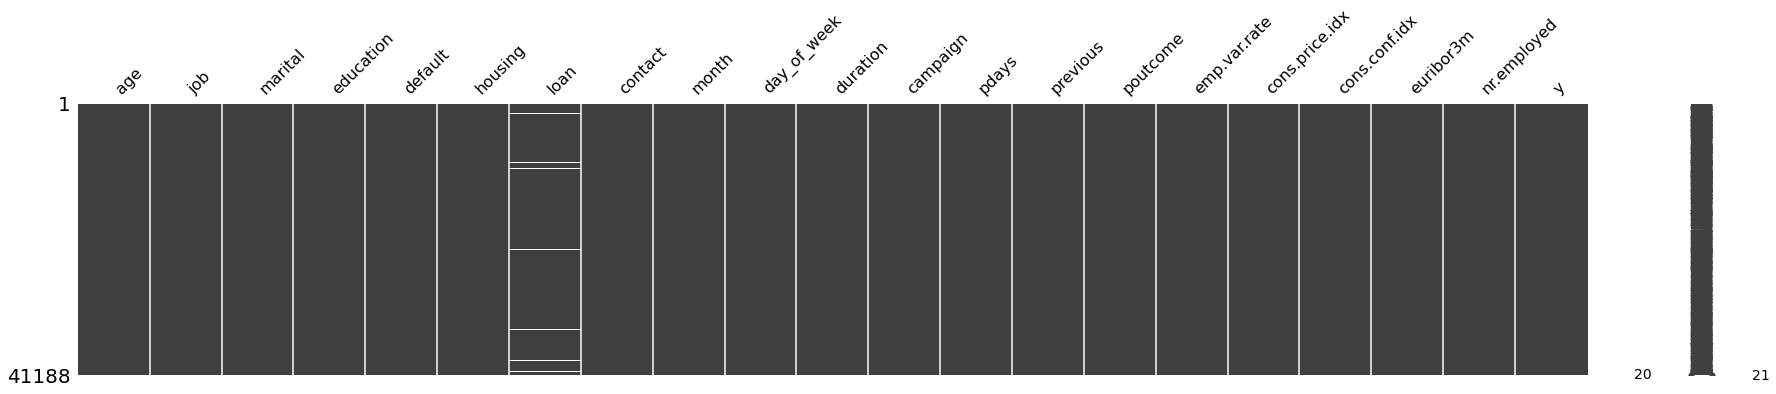

In [94]:
missingno.matrix(data_drop, figsize = (30,5))

In [95]:
data_drop.fillna(data_drop.mean(), inplace = True)

In [96]:
data_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100000,0.101727,0.102490,0.112662,0.108796,0.113402,0.052313,0.064347,0.099483,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081381,0.101727,0.108355,0.112662,0.108796,0.113402,0.052313,0.064347,0.099483,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081381,0.101727,0.108355,0.112662,0.115838,0.113402,0.052313,0.064347,0.099483,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129185,0.101727,0.082024,0.112662,0.108796,0.113402,0.052313,0.064347,0.099483,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081381,0.101727,0.108355,0.112662,0.108796,0.109315,0.052313,0.064347,0.099483,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0


In [21]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

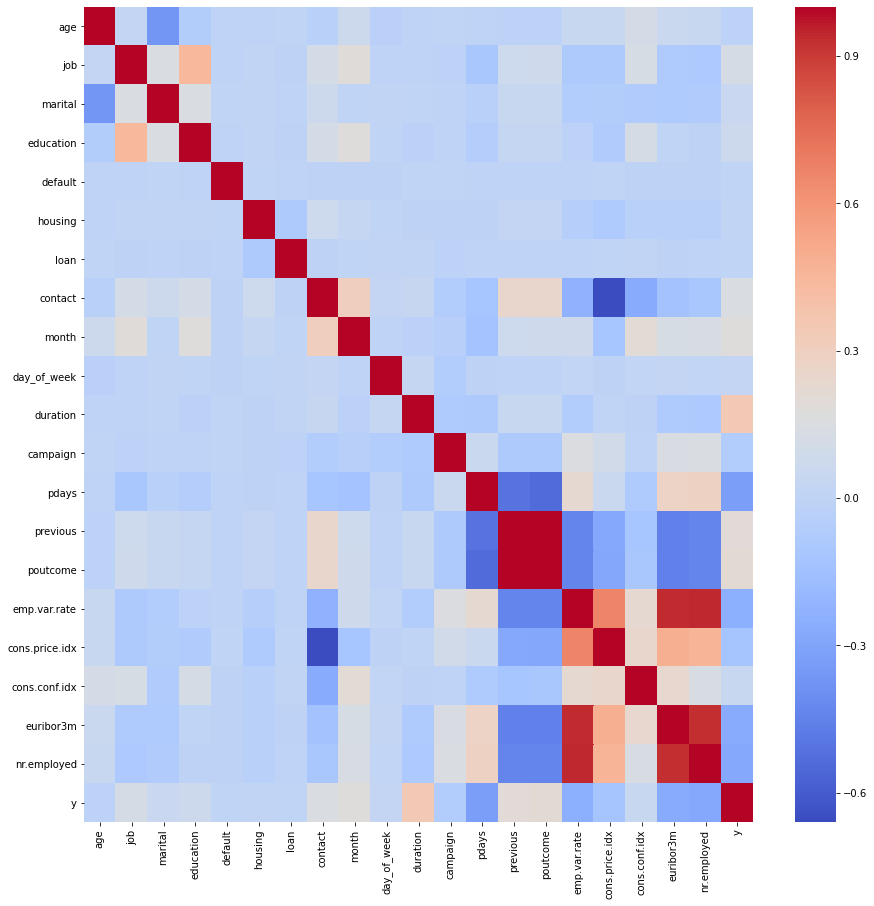

In [22]:
drawheatmap(data_drop)

### Feature Importance

Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.

In [ ]:
# Using Random Forest to gain an insight on Feature Importance

clf = RandomForestClassifier()
clf.fit(data_drop.drop('y', axis=1), data_drop['y'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=data_drop.drop('y', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

## PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

In [ ]:
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset

std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
pca1 = PCA(n_components=len(data_drop.columns)-1)
fit1 = pca1.fit(X)

std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
pca2 = PCA(n_components=len(data_drop.columns)-2)
fit2 = pca2.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

plt.subplot(1, 2, 2)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(0, fit2.explained_variance_ratio_.size), fit2.explained_variance_ratio_);

In [ ]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
y = data_drop['y']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

### Recursive Feature Elimination

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

In [ ]:
# Calculating RFE for non-discretised dataset, and graphing the Importance for each feature, per dataset

selector1 = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector1 = selector1.fit(data_drop.drop('y', axis=1).values, data_drop['y'].values)
#print("Feature Ranking For Non-Discretised: %s" % selector1.ranking_)
print("Optimal number of features : %d" % selector1.n_features_)
# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_);

# Feature space could be subsetted like so:
data_drop = data_drop[data_drop.columns[np.insert(selector1.support_, 0, True)]]

### Model Build

Train Test Split

In [ ]:
#data_drop['y'].replace({"no":0, "yes":1}, inplace=True)

In [ ]:
#data_drop['y'].head()

In [23]:
# get the target variable... create X and y
y = data_drop[['y']]
X = data_drop.drop(['y'], axis=1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,, random_state=1)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

SyntaxError: invalid syntax (<ipython-input-107-c1517f079b99>, line 1)

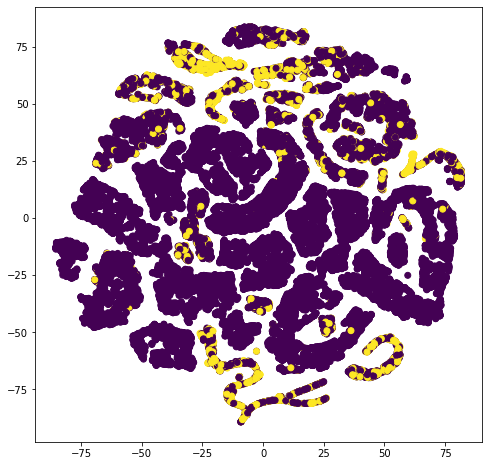

In [21]:
#Visualize data with T-SNE plot
%matplotlib inline

# T-SNE plot for train dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_train) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values)
plt.show()


### Algorithms

From here, we will be running the following algorithms.

- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree
- Gradient Boosted Trees
- BaggingClassifier
- AdaBoostClassifier 
- VotingClassifier

Because there's a great deal of repetitiveness on the code for each, we'll create a custom function to analyse this.

For some algorithms, we have also chosen to run a Random Hyperparameter search and GridSearch for Hyperparameters, to select the best hyperparameters for a given algorithm.

In [108]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier,
                          BaggingClassifier,
                          AdaBoostClassifier,
                          
                          ))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [109]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [32]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores

def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 5.04 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.909 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 0.19675663791893672, 'class_weight': None, 'C': 143.951376338554}

Model with rank: 2
Mean validation score: 0.907 (std: 0.002)
Parameters: {'penalty': 'l2', 'intercept_scaling': 419.04650827064955, 'class_weight': None, 'C': 0.000147780442180313}

Model with rank: 3
Mean validation score: 0.906 (std: 0.002)
Parameters: {'penalty': 'l2', 'intercept_scaling': 427428115.8769399, 'class_weight': None, 'C': 2.1748722069015754e-06}

Model with rank: 4
Mean validation score: 0.879 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 16547099.26400307, 'class_weight': 'balanced', 'C': 1.2274643878530034e-10}

Model with rank: 5
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 3.5120003899516495e-05, 'class_weight': 'balanced', 'C': 0.014649290175301338}



In [33]:
# Logistic Regression

start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 90.86
Accuracy CV 10-Fold: 90.87
Running Time: 0:00:05.212674


In [34]:
from sklearn.metrics import classification_report
print (metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29240
           1       0.66      0.39      0.49      3710

    accuracy                           0.91     32950
   macro avg       0.79      0.68      0.72     32950
weighted avg       0.90      0.91      0.90     32950



In [35]:
print (metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.66      0.39      0.49       930

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



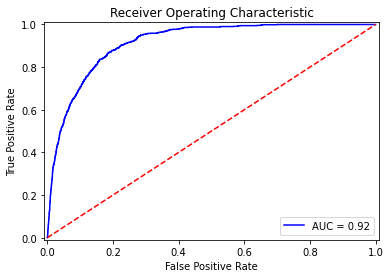

In [36]:
plot_roc_curve(y_test, probs_log)

AUC for k =  1 is 0.7932795698924731
AUC for k =  8 is 0.9060656019916309
AUC for k =  15 is 0.9162125318549122
AUC for k =  22 is 0.9197408496212723
AUC for k =  29 is 0.9231747061697005
AUC for k =  36 is 0.9245767637174757
AUC for k =  43 is 0.9258325682268953
AUC for k =  50 is 0.9262343226748122
AUC for k =  57 is 0.9261714956653776
AUC for k =  64 is 0.9269170330349419


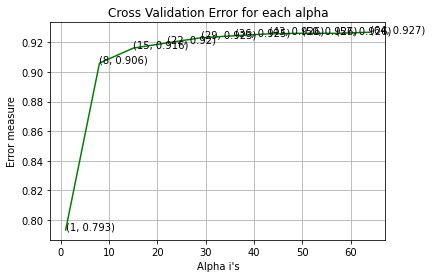

For values of best alpha =  64 The train AUC is: 0.9404595069708446
For values of best alpha =  64 The test AUC is: 0.9269170330349419


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
%matplotlib inline

alpha = [x for x in range(1, 70, 7)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    cv_auc_array.append(roc_auc_score(y_test, predict_y[:,1]))
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])
best_alpha = np.argmax(cv_auc_array)
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

In [43]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors=alpha[best_alpha],
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 90.86
Accuracy CV 10-Fold: 91.23
Running Time: 0:00:21.689712


In [44]:
print (metrics.classification_report(y_train, train_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     29240
           1       0.65      0.47      0.55      3710

    accuracy                           0.91     32950
   macro avg       0.79      0.72      0.75     32950
weighted avg       0.90      0.91      0.91     32950



In [45]:
print (metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.63      0.45      0.53       930

    accuracy                           0.91      8238
   macro avg       0.78      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238



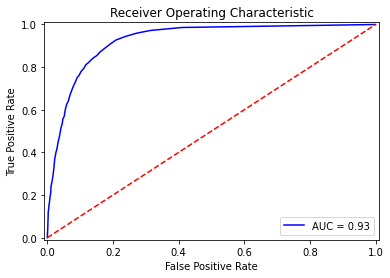

In [46]:
plot_roc_curve(y_test, probs_knn)

In [47]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 87.27
Accuracy CV 10-Fold: 87.95
Running Time: 0:00:00.622538


In [48]:
print (metrics.classification_report(y_train, train_pred_gaussian))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     29240
           1       0.47      0.54      0.50      3710

    accuracy                           0.88     32950
   macro avg       0.70      0.73      0.72     32950
weighted avg       0.89      0.88      0.88     32950



In [49]:
print (metrics.classification_report(y_test, test_pred_gaussian))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7308
           1       0.44      0.52      0.48       930

    accuracy                           0.87      8238
   macro avg       0.69      0.72      0.70      8238
weighted avg       0.88      0.87      0.88      8238



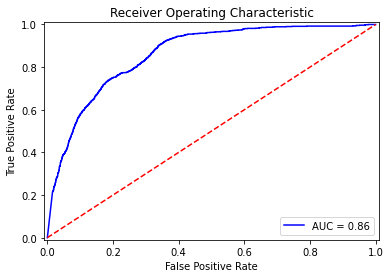

In [50]:
plot_roc_curve(y_test, probs_gau)

In [51]:
# Linear SVC

start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))


Accuracy: 89.91
Accuracy CV 10-Fold: 76.73
Running Time: 0:01:19.566544


In [52]:
print (metrics.classification_report(y_train, train_pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     29240
           1       0.21      0.40      0.28      3710

    accuracy                           0.77     32950
   macro avg       0.56      0.61      0.57     32950
weighted avg       0.84      0.77      0.80     32950



In [53]:
print (metrics.classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7308
           1       0.74      0.17      0.27       930

    accuracy                           0.90      8238
   macro avg       0.82      0.58      0.61      8238
weighted avg       0.88      0.90      0.87      8238



In [54]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 88.76
Accuracy CV 10-Fold: 82.36
Running Time: 0:00:09.620689


In [55]:
print (metrics.classification_report(y_train, train_pred_sgd))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     29240
           1       0.29      0.39      0.33      3710

    accuracy                           0.82     32950
   macro avg       0.60      0.63      0.61     32950
weighted avg       0.85      0.82      0.83     32950



In [56]:
print (metrics.classification_report(y_test, test_pred_sgd))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7308
           1       0.61      0.01      0.02       930

    accuracy                           0.89      8238
   macro avg       0.75      0.51      0.48      8238
weighted avg       0.86      0.89      0.84      8238



In [57]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 88.13
Accuracy CV 10-Fold: 88.88
Running Time: 0:00:01.648001


In [58]:
print (metrics.classification_report(y_train, train_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     29240
           1       0.51      0.52      0.51      3710

    accuracy                           0.89     32950
   macro avg       0.72      0.73      0.72     32950
weighted avg       0.89      0.89      0.89     32950



In [59]:
print (metrics.classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7308
           1       0.47      0.49      0.48       930

    accuracy                           0.88      8238
   macro avg       0.70      0.71      0.71      8238
weighted avg       0.88      0.88      0.88      8238



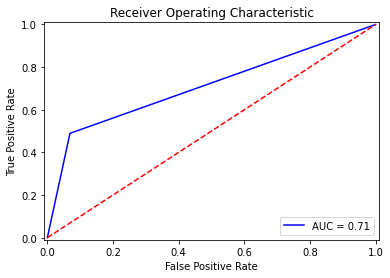

In [60]:
plot_roc_curve(y_test, probs_dt)

In [61]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores

def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 20),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV took 12.49 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.917 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 18, 'min_samples_split': 21}

Model with rank: 2
Mean validation score: 0.916 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 15, 'min_samples_split': 13}

Model with rank: 3
Mean validation score: 0.916 (std: 0.005)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 28}

Model with rank: 4
Mean validation score: 0.916 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 18, 'min_samples_split': 29}

Model with rank: 5
Mean validation score: 0.916 (std: 0.004)
Parameters: {'bootstrap': False, 'criterion': 'entrop

In [62]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 91.21
Accuracy CV 10-Fold: 91.57
Running Time: 0:00:04.191084


In [63]:
print (metrics.classification_report(y_train, train_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29240
           1       0.65      0.55      0.60      3710

    accuracy                           0.92     32950
   macro avg       0.80      0.76      0.77     32950
weighted avg       0.91      0.92      0.91     32950



In [64]:
print (metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.63      0.53      0.58       930

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.76      8238
weighted avg       0.91      0.91      0.91      8238



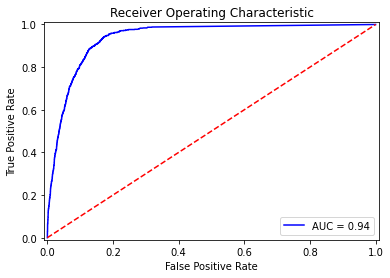

In [65]:
plot_roc_curve(y_test, probs_rf)

In [66]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 91.1
Accuracy CV 10-Fold: 91.76
Running Time: 0:00:44.532315


In [67]:
print (metrics.classification_report(y_train, train_pred_gbt))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29240
           1       0.66      0.55      0.60      3710

    accuracy                           0.92     32950
   macro avg       0.80      0.76      0.78     32950
weighted avg       0.91      0.92      0.91     32950



In [68]:
print (metrics.classification_report(y_test, test_pred_gbt))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.63      0.53      0.57       930

    accuracy                           0.91      8238
   macro avg       0.78      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



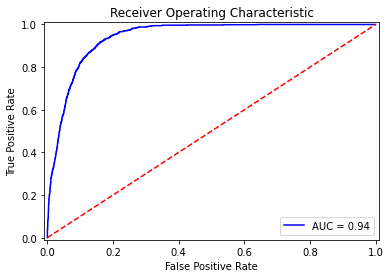

In [69]:
plot_roc_curve(y_test, probs_gbt)

In [73]:
# BaggingClassifier
from sklearn.svm import SVC

start_time = time.time()
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100)
svc_model = SVC()
train_pred_bc, test_pred_bc, acc_bc, acc_cv_bc, probs_bc = fit_ml_algo(BaggingClassifier(base_estimator=svc_model, n_estimators=100,random_state=100), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
bc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_bc)
print("Accuracy CV 10-Fold: %s" % acc_cv_bc)
print("Running Time: %s" % datetime.timedelta(seconds=bc_time))

Accuracy: 89.82
Accuracy CV 10-Fold: 89.76
Running Time: 1:35:31.605381


In [74]:
print (metrics.classification_report(y_train, train_pred_bc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     29240
           1       0.63      0.22      0.32      3710

    accuracy                           0.90     32950
   macro avg       0.77      0.60      0.63     32950
weighted avg       0.88      0.90      0.87     32950



In [75]:
print (metrics.classification_report(y_test, test_pred_bc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.64      0.22      0.33       930

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



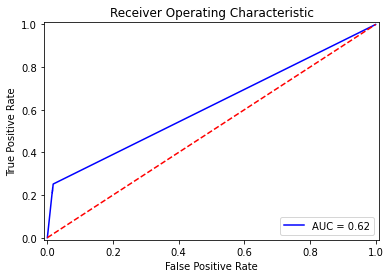

In [76]:
plot_roc_curve(y_test, probs_bc)

In [60]:
# AdaBoostClassifier 
start_time = time.time()
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100)
train_pred_abcl, test_pred_abcl, acc_abcl, acc_cv_abcl, probs_abcl = fit_ml_algo(AdaBoostClassifier(base_estimator=dt_model, n_estimators=100,random_state=100), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
abcl_time = (time.time() - start_time)
print("Accuracy: %s" % acc_abcl)
print("Accuracy CV 10-Fold: %s" % acc_cv_abcl)
print("Running Time: %s" % datetime.timedelta(seconds=abcl_time))

Accuracy: 89.22
Accuracy CV 10-Fold: 89.08
Running Time: 0:00:00.977618


In [61]:
print (metrics.classification_report(y_train, train_pred_abcl))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     29242
           1       0.51      0.53      0.52      3708

    accuracy                           0.89     32950
   macro avg       0.73      0.73      0.73     32950
weighted avg       0.89      0.89      0.89     32950



In [62]:
print (metrics.classification_report(y_test, test_pred_abcl))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7306
           1       0.52      0.53      0.53       932

    accuracy                           0.89      8238
   macro avg       0.73      0.74      0.73      8238
weighted avg       0.89      0.89      0.89      8238



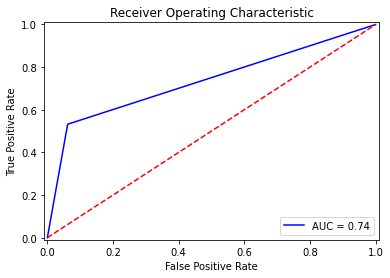

In [63]:
plot_roc_curve(y_test, probs_abcl)

In [64]:
#Multiple model Ensemble - VotingClassifier
LR=LogisticRegression()
NB=GaussianNB()
SVM=svm.SVC()

start_time = time.time()

train_pred_vot, test_pred_vot, acc_vot, acc_cv_vot, _ = fit_ml_algo(VotingClassifier(estimators=[('LR',LR),('NB',NB),('SVM',SVM)],voting='hard'), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
vot_time = (time.time() - start_time)
print("Accuracy: %s" % acc_vot)
print("Accuracy CV 10-Fold: %s" % acc_cv_vot)
print("Running Time: %s" % datetime.timedelta(seconds=vot_time))

Accuracy: 90.4
Accuracy CV 10-Fold: 90.41
Running Time: 0:01:39.007919


In [65]:
print (metrics.classification_report(y_train, train_pred_vot))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     29242
           1       0.63      0.36      0.46      3708

    accuracy                           0.90     32950
   macro avg       0.78      0.67      0.70     32950
weighted avg       0.89      0.90      0.89     32950



In [66]:
print (metrics.classification_report(y_test, test_pred_vot))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7306
           1       0.63      0.36      0.46       932

    accuracy                           0.90      8238
   macro avg       0.78      0.67      0.70      8238
weighted avg       0.89      0.90      0.89      8238



In [67]:
#Multiple model Ensemble - VotingClassifier - GridSearch for Hyperparameters

start_time = time.time()
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft')
params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}


train_pred_gs, test_pred_gs, acc_gs, acc_cv_gs, probs_gs = fit_ml_algo(GridSearchCV(estimator=eclf, param_grid=params, cv=5), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gs_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gs)
print("Accuracy CV 10-Fold: %s" % acc_cv_gs)
print("Running Time: %s" % datetime.timedelta(seconds=gs_time))


Accuracy: 90.68
Accuracy CV 10-Fold: 90.61
Running Time: 0:06:51.030456


In [68]:
print (metrics.classification_report(y_train, train_pred_gs))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29242
           1       0.60      0.51      0.55      3708

    accuracy                           0.91     32950
   macro avg       0.77      0.73      0.75     32950
weighted avg       0.90      0.91      0.90     32950



In [69]:
print (metrics.classification_report(y_test, test_pred_gs))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7306
           1       0.61      0.49      0.55       932

    accuracy                           0.91      8238
   macro avg       0.77      0.73      0.75      8238
weighted avg       0.90      0.91      0.90      8238



In [119]:
#XGBoost
import xgboost as xgb

start_time = time.time()

train_pred_xgb1, test_pred_xgb1, acc_xgb1, acc_cv_xgb1, probs_xgb1 = fit_ml_algo(xgb.XGBClassifier(max_depth=5, n_estimators=100 ,class_weight='balanced', n_jobs=-1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
xgb_time1 = (time.time() - start_time)
print("Accuracy: %s" % acc_xgb1)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb1)
print("Running Time: %s" % datetime.timedelta(seconds=xgb_time1))

Accuracy: 91.24
Accuracy CV 10-Fold: 91.49
Running Time: 0:00:41.861806


In [120]:
print (metrics.classification_report(y_train, train_pred_xgb1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29240
           1       0.64      0.54      0.59      3710

    accuracy                           0.91     32950
   macro avg       0.79      0.75      0.77     32950
weighted avg       0.91      0.91      0.91     32950



In [121]:
print (metrics.classification_report(y_test, test_pred_xgb1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.63      0.54      0.58       930

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [116]:
#XGBoost
from scipy.stats import uniform, randint

start_time = time.time()
xgb_model = xgb.XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


train_pred_xgb, test_pred_xgb, acc_xgb, acc_cv_xgb, probs_xgb = fit_ml_algo(RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
xgb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_xgb)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb)
print("Running Time: %s" % datetime.timedelta(seconds=xgb_time))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 23.6min finished


Accuracy: 91.25
Accuracy CV 10-Fold: 91.78
Running Time: 3:13:53.482171


In [117]:
print (metrics.classification_report(y_train, train_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29240
           1       0.66      0.55      0.60      3710

    accuracy                           0.92     32950
   macro avg       0.80      0.76      0.78     32950
weighted avg       0.91      0.92      0.91     32950



In [118]:
print (metrics.classification_report(y_test, test_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.63      0.54      0.58       930

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



### Conclusion
- It was a great learning experience working on a financial dataset.
- Our dataset consist of categorical and numerical features.
- We have 16 independent features, out of these only half of them are important. 'duration' is the most important feature while 'education' is the least important feature.
- Highest success rate is observed for end month of the financial year as well as the calendar year. So one can say that our dataset have some kind of seasonality.
- When visualized age in groups, it is found that clients with age less than 30 and greater than 60 are less contacted through the campaign but have a higher success rate.
- Different machine learning models are trained and tested on the dataset. 
- Different models are summarized in table below.

In [70]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'BaggingClassifier', 'AdaBoostClassifier',
              'Multiple model Ensemble - Voting',
              'Multiple model Ensemble - Voting - GridSearch'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_bc,
        acc_abcl,
        acc_vot,
        acc_gs
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,91.73
8,BaggingClassifier,91.70
2,Random Forest,91.42
1,Logistic Regression,90.76
4,Stochastic Gradient Decent,90.75
11,Multiple model Ensemble - Voting - GridSearch,90.68
10,Multiple model Ensemble - Voting,90.40
0,KNN,90.30
5,Linear SVC,90.12
9,AdaBoostClassifier,89.22


In [71]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'BaggingClassifier', 'AdaBoostClassifier',
              'Multiple model Ensemble - Voting',
              'Multiple model Ensemble - Voting - GridSearch'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_bc,
        acc_cv_abcl,
        acc_cv_vot,
        acc_cv_gs
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,91.63
2,Random Forest,91.32
8,BaggingClassifier,91.32
1,Logistic Regression,90.87
11,Multiple model Ensemble - Voting - GridSearch,90.61
10,Multiple model Ensemble - Voting,90.41
0,KNN,89.90
9,AdaBoostClassifier,89.08
6,Decision Tree,88.94
3,Naive Bayes,87.84


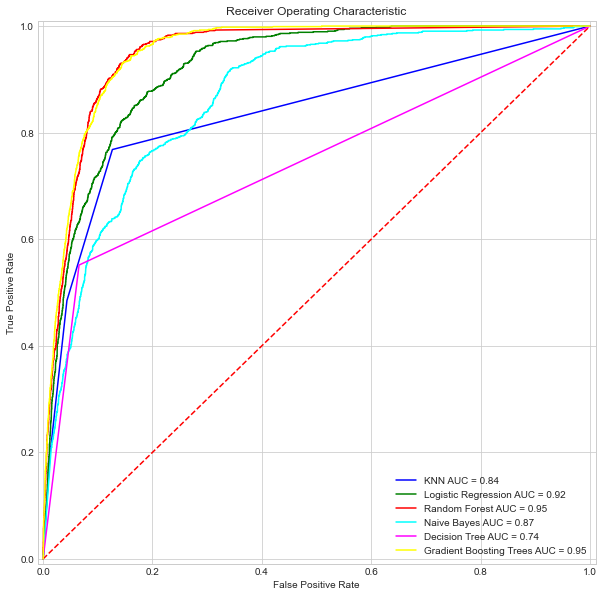

In [72]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees'
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow'
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()